In [ ]:
import os
os.chdir(r'E:\Protein Loc\Gene Ontology\Actual_GO')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
model=Sequential(name='mPLoc')
model.add(Input((37433,)))
model.add(Dense(12477,activation='sigmoid'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(11,activation='sigmoid'))
model.summary()

In [ ]:
from tensorflow import config
config.list_physical_devices('GPU')

In [ ]:
import pandas as pd
import numpy as np
train_df=pd.read_parquet('Actual_Train_GO.parquet')
train_labels=pd.read_csv('Actual_train_labels.csv')
test_df=pd.read_parquet('Actual_Test_GO.parquet')
test_labels=pd.read_csv('Actual_test_labels.csv')
test_labels=test_labels.iloc[:,1:-1]
test_labels

In [ ]:
train_df

In [ ]:
train_labels=train_labels.iloc[:,1:-1]
train_labels

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(train_df,train_labels,test_size=0.2)
X_train

In [ ]:
X_val

In [ ]:
y_train

In [ ]:
y_val

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train.to_numpy(),y_train.to_numpy(),batch_size=512,epochs=10,validation_data=(X_val.to_numpy(),y_val.to_numpy()))

In [ ]:
model.save('Act_GO.keras')

In [5]:
from ClassLabels import label_generator
from multiLabelMetrics import accuracy
test_labs = label_generator(model.predict(test_df))

35/35 [==============================] - 7s 195ms/step


In [6]:
test_acc = accuracy(test_labs,test_labels.to_numpy())
test_acc.strictAccuracy()

44.69835466179159

In [7]:
test_acc.relaxedAccuracy()

91.20824331061993

In [8]:
pd.DataFrame(test_labs,columns=test_labels.columns).to_csv('GO_preds.csv',index=False)

In [9]:
df=pd.read_csv('GO_preds.csv')
df['Sum']=[0]*len(df)
for i in range(len(df)):
    df.iloc[i,-1]=max(sum(df.iloc[i,:-1]),1)
counts=df['Sum'].value_counts()

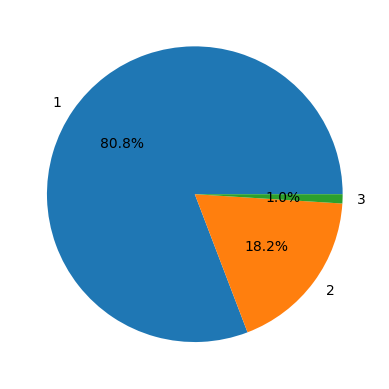

In [10]:
import matplotlib.pyplot as plt
plt.pie(counts,labels=counts.index,autopct='%1.1f%%')
plt.show()

In [11]:
counts

Sum
1    884
2    199
3     11
Name: count, dtype: int64

In [12]:
test_labels

,Membrane,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1678,0,0,1,0,0,0,0,0,0,0,0
1679,0,0,0,0,0,0,0,0,0,1,0
1680,0,0,0,0,0,1,0,0,0,0,0
1683,0,0,1,0,0,0,0,0,0,0,0


In [13]:
s=[]
for i in range(len(test_labels)):
    s.append(sum(test_labels.iloc[i,:]))

In [14]:
test_labels['Sum']=s
test_labels

,Membrane,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome,Sum
0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,0,1
4,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0,0,1,0,0,0,0,0,0,0,0,1
1679,0,0,0,0,0,0,0,0,0,1,0,1
1680,0,0,0,0,0,1,0,0,0,0,0,1
1683,0,0,1,0,0,0,0,0,0,0,0,1


In [23]:
c=test_labels['Sum'].value_counts()

In [16]:
actual_labels = test_labels.reset_index().iloc[:,1:]

In [17]:
correct_predictions = (df.iloc[:,:-1]==actual_labels.iloc[:,:-1]).sum()
correct_predictions

Membrane                  869
Cytoplasm                 859
Nucleus                   851
Extracellular            1069
Cell membrane             966
Mitochondrion            1026
Plastid                  1067
Endoplasmic reticulum    1054
Lysosome/Vacuole         1081
Golgi apparatus          1045
Peroxisome               1089
dtype: int64

In [18]:
total_instances = test_labels.shape[0]
label_accuracy = correct_predictions / total_instances

In [19]:
label_accuracy

Membrane                 0.794333
Cytoplasm                0.785192
Nucleus                  0.777879
Extracellular            0.977148
Cell membrane            0.882998
Mitochondrion            0.937843
Plastid                  0.975320
Endoplasmic reticulum    0.963437
Lysosome/Vacuole         0.988117
Golgi apparatus          0.955210
Peroxisome               0.995430
dtype: float64

In [20]:
from sklearn.metrics import matthews_corrcoef,confusion_matrix
mcc_scores = {}
for column in actual_labels.columns[:-1]:  # Exclude the 'num_labels' column
    mcc = matthews_corrcoef(actual_labels[column], df[column])
    mcc_scores[column] = mcc

In [21]:
mcc_scores

{'Membrane': 0.0,
 'Cytoplasm': 0.4911801569495505,
 'Nucleus': 0.5683264158870592,
 'Extracellular': 0.0,
 'Cell membrane': 0.5335579904468588,
 'Mitochondrion': 0.6915262357692188,
 'Plastid': 0.0,
 'Endoplasmic reticulum': 0.47518920413170823,
 'Lysosome/Vacuole': 0.3629683619078001,
 'Golgi apparatus': 0.42896524801360225,
 'Peroxisome': 0.5454582590485587}

In [22]:
for column in actual_labels.columns[:-1]:  # Exclude the 'num_labels' column
    cf = confusion_matrix(actual_labels[column], df[column])
    print(column)
    print('*******************************')
    print(cf)

Membrane
*******************************
[[869 225]
 [  0   0]]
Cytoplasm
*******************************
[[646 108]
 [127 213]]
Nucleus
*******************************
[[476  66]
 [177 375]]
Extracellular
*******************************
[[1069   25]
 [   0    0]]
Cell membrane
*******************************
[[880  26]
 [102  86]]
Mitochondrion
*******************************
[[941  15]
 [ 53  85]]
Plastid
*******************************
[[1067   27]
 [   0    0]]
Endoplasmic reticulum
*******************************
[[1037    7]
 [  33   17]]
Lysosome/Vacuole
*******************************
[[1079   13]
 [   0    2]]
Golgi apparatus
*******************************
[[1030    4]
 [  45   15]]
Peroxisome
*******************************
[[1086    3]
 [   2    3]]


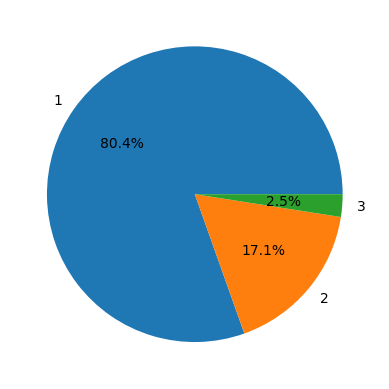

In [24]:
import matplotlib.pyplot as plt
plt.pie(c,labels=c.index,autopct='%1.1f%%')
plt.show()

In [26]:
correct_mask = (df.iloc[:, :-1] == actual_labels.iloc[:, :-1]).all(axis=1)
correct_labels=df[correct_mask]

In [27]:
correct_labels

,Membrane,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome,Sum
0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,1
5,0,0,1,0,0,0,0,0,0,0,0,1
7,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0,0,1,0,0,0,0,0,0,0,0,1
1085,0,0,1,0,0,0,0,0,0,0,0,1
1086,0,0,0,0,0,1,0,0,0,0,0,1
1089,0,0,1,0,0,0,0,0,0,0,0,1


In [28]:
act_lab = actual_labels[correct_mask]
act_lab

,Membrane,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome,Sum
0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,1
5,0,0,1,0,0,0,0,0,0,0,0,1
7,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0,0,1,0,0,0,0,0,0,0,0,1
1085,0,0,1,0,0,0,0,0,0,0,0,1
1086,0,0,0,0,0,1,0,0,0,0,0,1
1089,0,0,1,0,0,0,0,0,0,0,0,1


In [29]:
act_lab['Sum'].value_counts()

Sum
1    472
2     17
Name: count, dtype: int64

In [30]:
correct_labels['Sum'].value_counts()

Sum
1    472
2     17
Name: count, dtype: int64